## Student performance indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- The data consists of 8 column and 1000 rows.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

## Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
## check any missing values

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values

In [7]:
## check any duplicate values
df.duplicated().sum()

0

### No duplicates as well

In [8]:
## check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Number of unique values in each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
## as we can see by this data 
## the mean range is in between 66 to 69
## the standard deviation are close to 14.60 to 15.19

## Explorating data

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in gender column : " ,end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity column : " ,end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education column : " ,end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch column : " ,end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course column : " ,end=" ")
print(df['test_preparation_course'].unique())

Categories in gender column :  ['female' 'male']
Categories in race_ethnicity column :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education column :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column :  ['standard' 'free/reduced']
Categories in test_preparation_course column :  ['none' 'completed']


In [14]:
##numeric columns
num_features=[features for features in df.columns if df[features].dtypes!='O']
##category columns
cat_features=[features for features in df.columns if df[features].dtype=='O']

In [15]:
print("Number of numeric features",len(num_features))
print(num_features)
print("Number of category features",len(cat_features))
print(cat_features)

Number of numeric features 3
['math_score', 'reading_score', 'writing_score']
Number of category features 5
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## feature engineering
### 3.8 Adding columns for "Total Score" and "Average"

In [17]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_score']=df['Total_score']/3

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
## student who scored full marks

reading_full=df[df['reading_score']==100]['Average_score'].count()
writing_full=df[df['writing_score']==100]['Average_score'].count()
math_full=df[df['math_score']==100]['Average_score'].count()
print("Number of students who score full marks in maths : ",math_full)
print("Number of students who score full marks in writing : ",writing_full)
print("Number of students who score full marks in reading : ",reading_full)

Number of students who score full marks in maths :  7
Number of students who score full marks in writing :  14
Number of students who score full marks in reading :  17


In [20]:
##Student who score less than 20

reading_less=df[df['reading_score']<=20]['Average_score'].count()
writing_less=df[df['writing_score']<=20]['Average_score'].count()
math_less=df[df['math_score']<=20]['Average_score'].count()
print("Number of students who score full marks in maths : ",math_less)
print("Number of students who score full marks in writing : ",writing_less)
print("Number of students who score full marks in reading : ",reading_less)

Number of students who score full marks in maths :  4
Number of students who score full marks in writing :  3
Number of students who score full marks in reading :  1


- By above conclusion we can see that students are worse in maths and students are good in reading

## Data Visualization

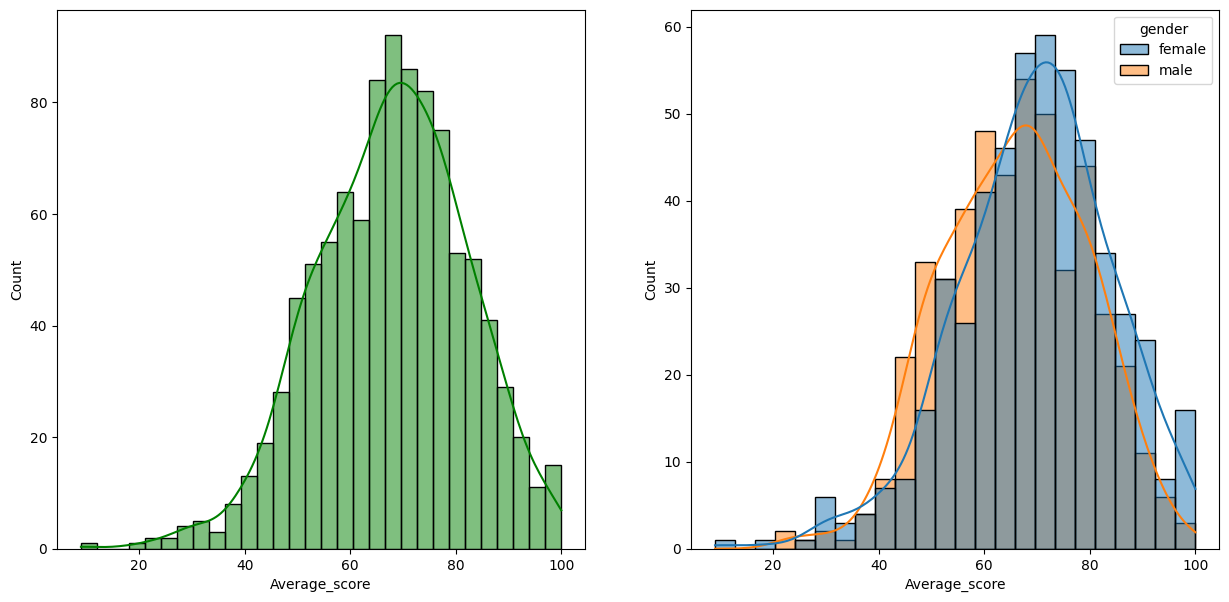

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
plt.show()

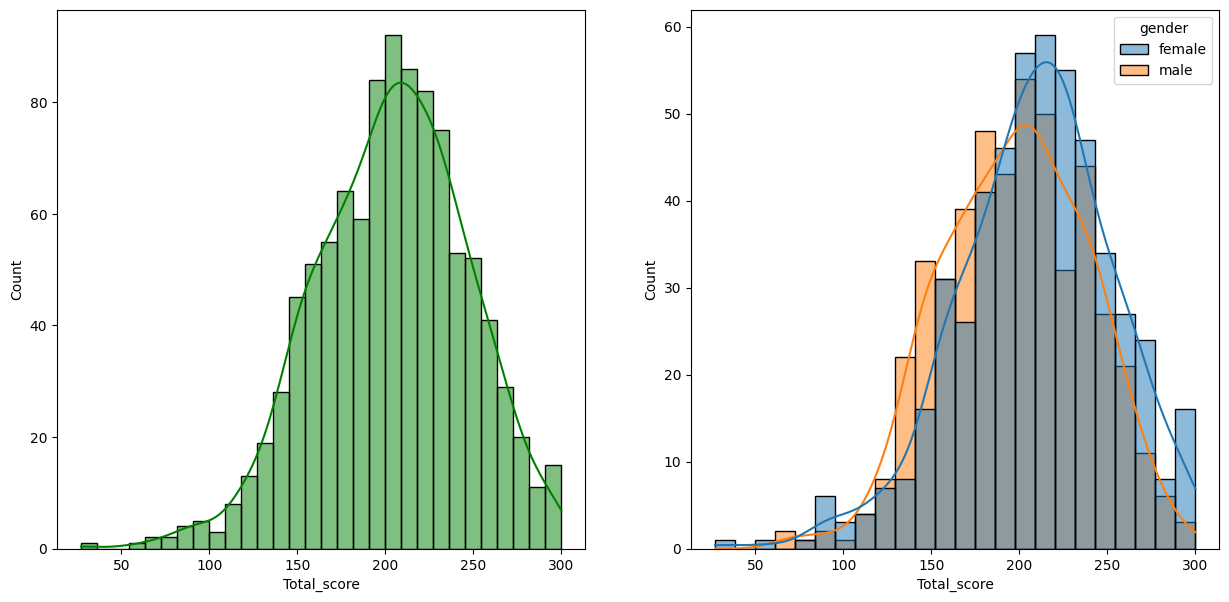

In [22]:
##With total score
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

- Above we can see that girls perform well as compare to boys

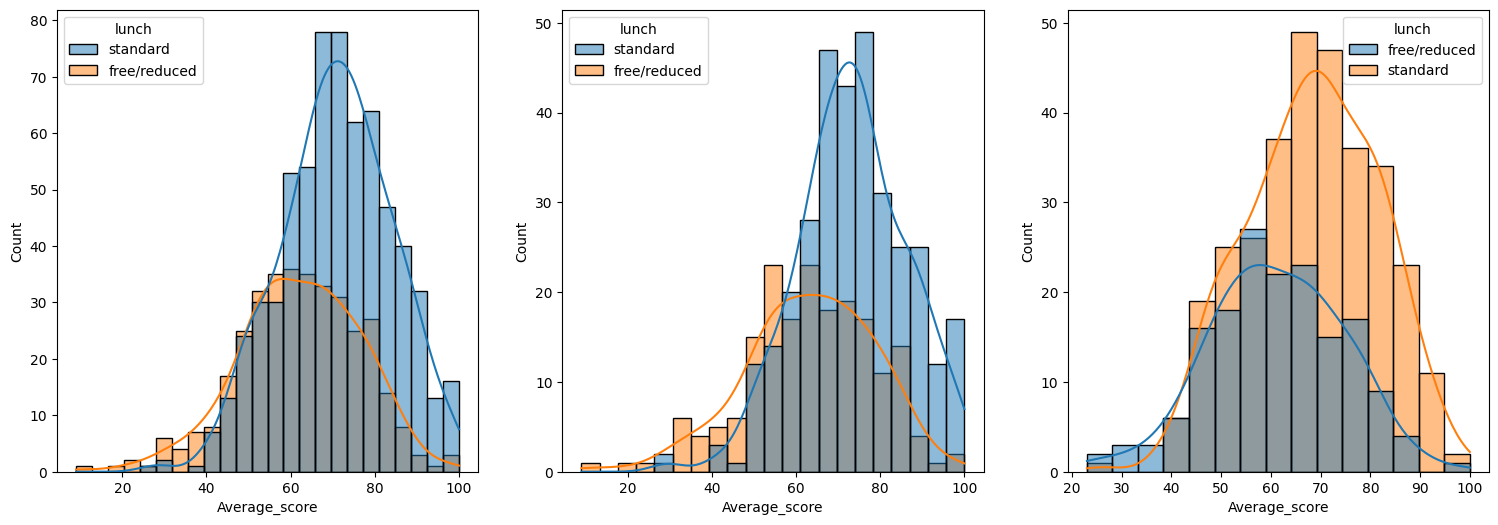

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',hue='lunch',kde=True)
plt.show()

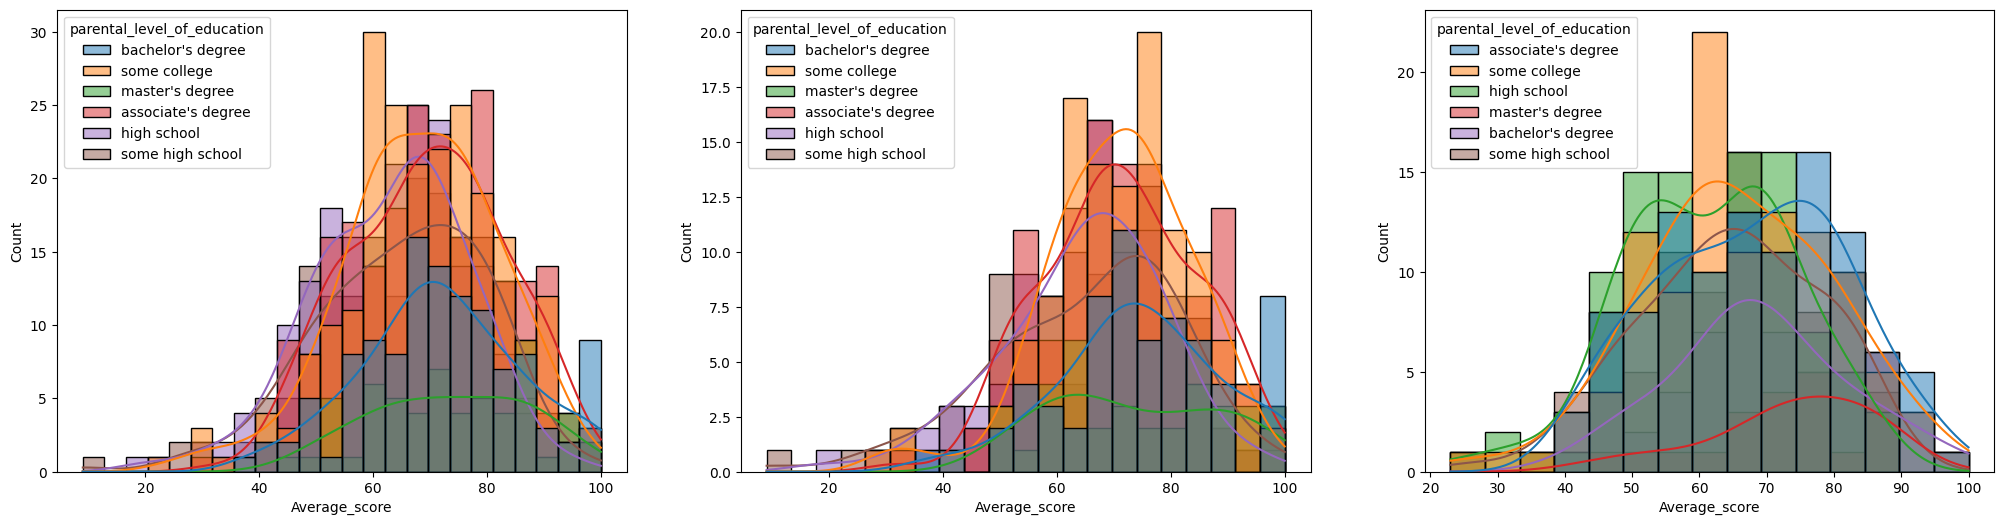

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',hue='parental_level_of_education',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',hue='parental_level_of_education',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',hue='parental_level_of_education',kde=True)
plt.show()

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

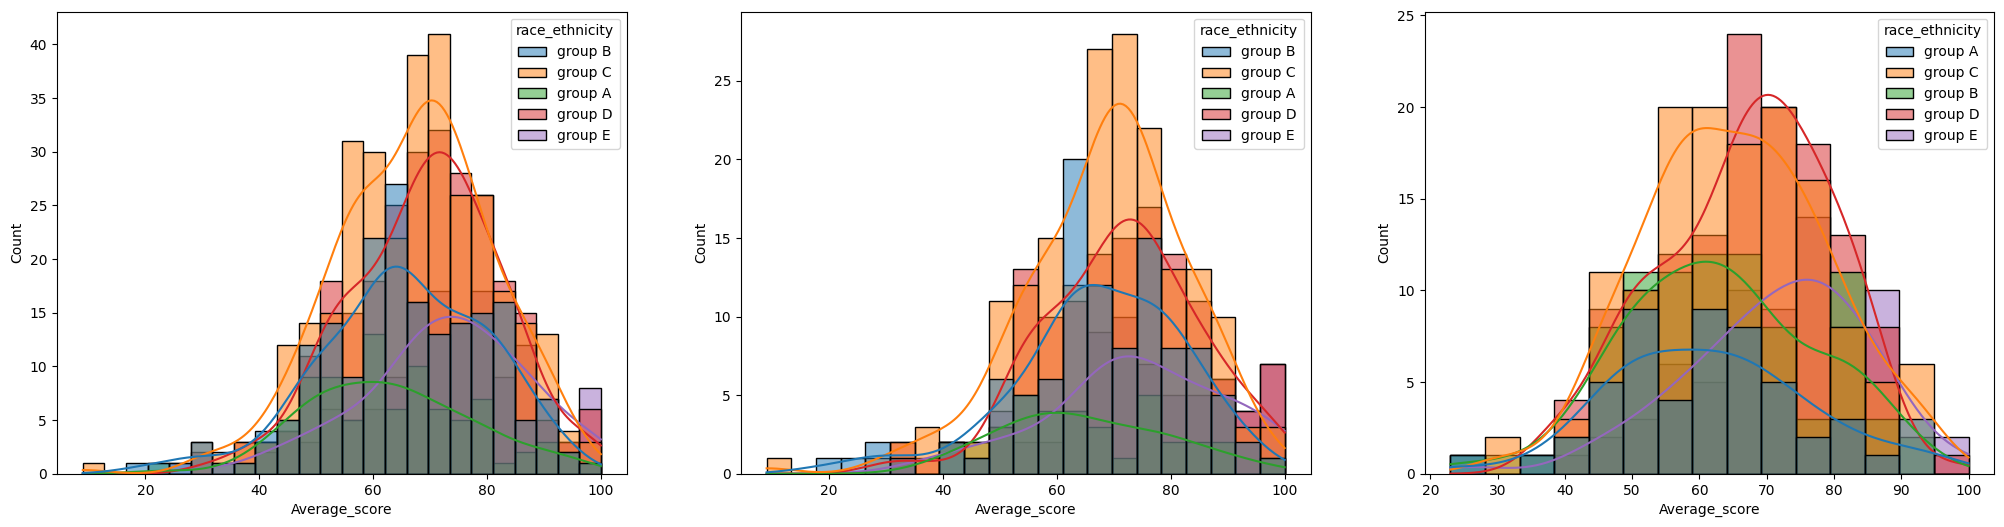

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',hue='race_ethnicity',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',hue='race_ethnicity',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',hue='race_ethnicity',kde=True)
plt.show()

- Students of group A ,group E and group B tends to perform poorly in exam.
- Students of group A ,group E and group B tends to perform poorly in exam irrespective of whether they are male or female

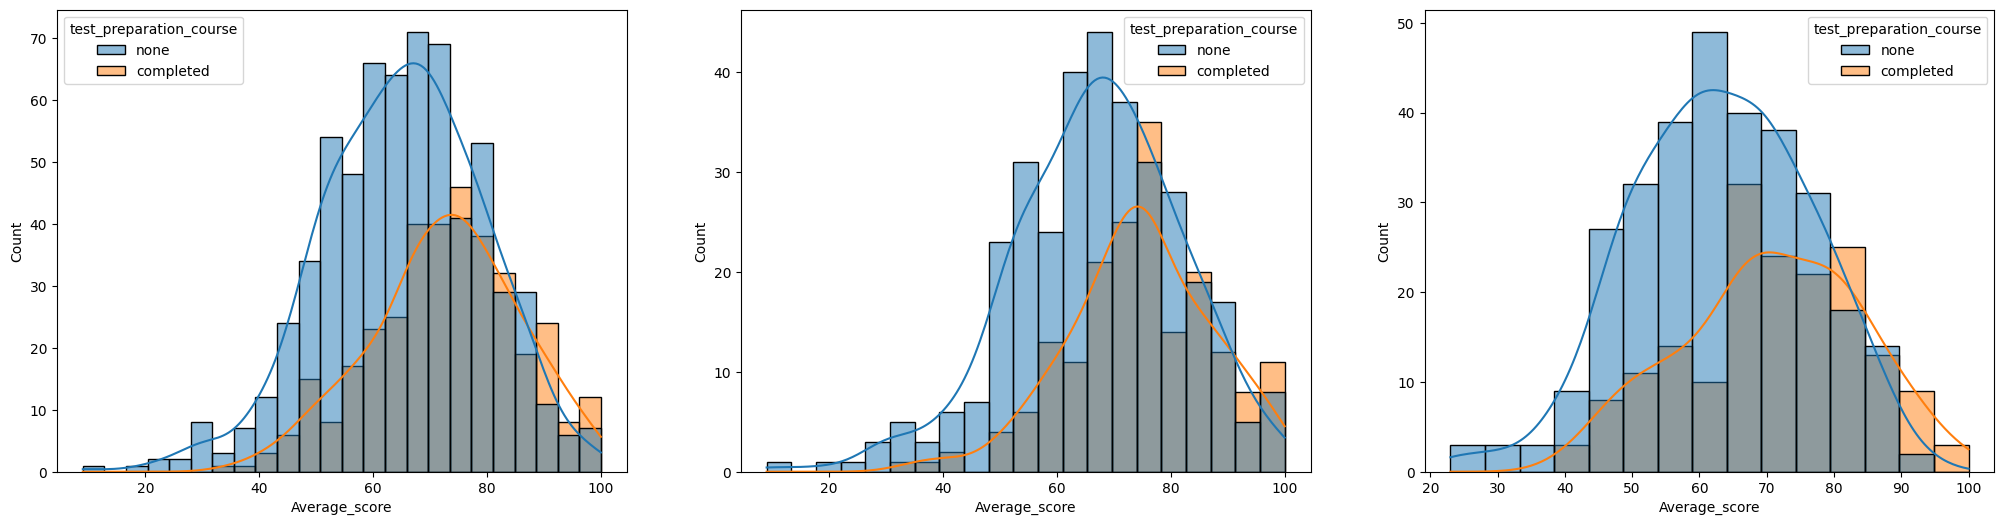

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',hue='test_preparation_course',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',hue='test_preparation_course',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',hue='test_preparation_course',kde=True)
plt.show()

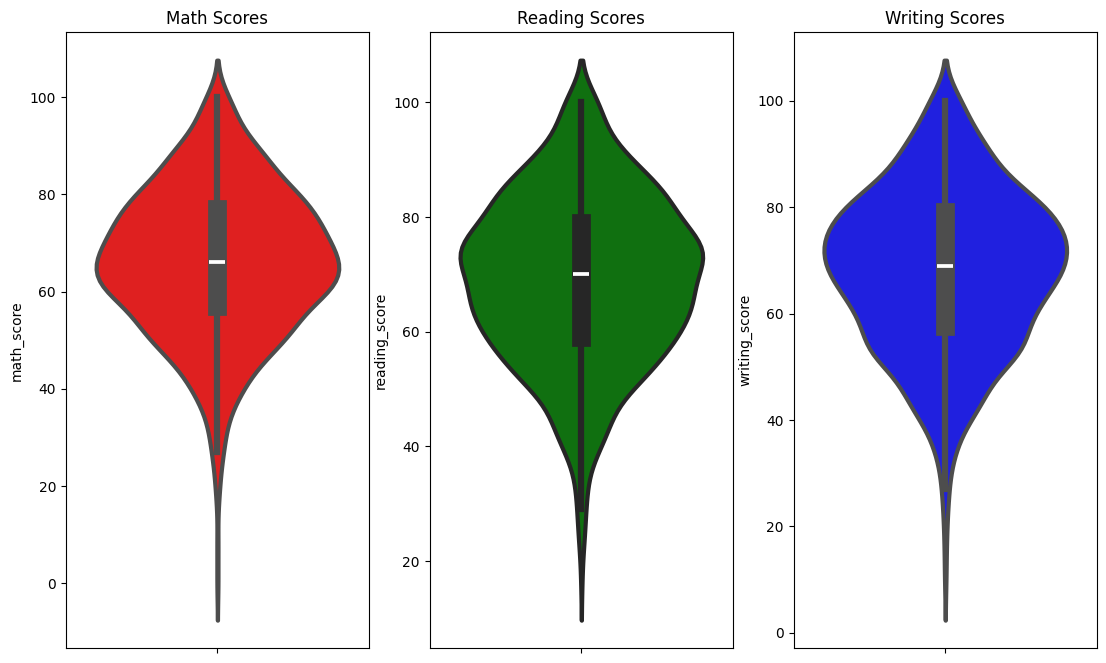

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Scores")
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Scores")
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

(-1.25, 1.25, -1.25, 1.25)

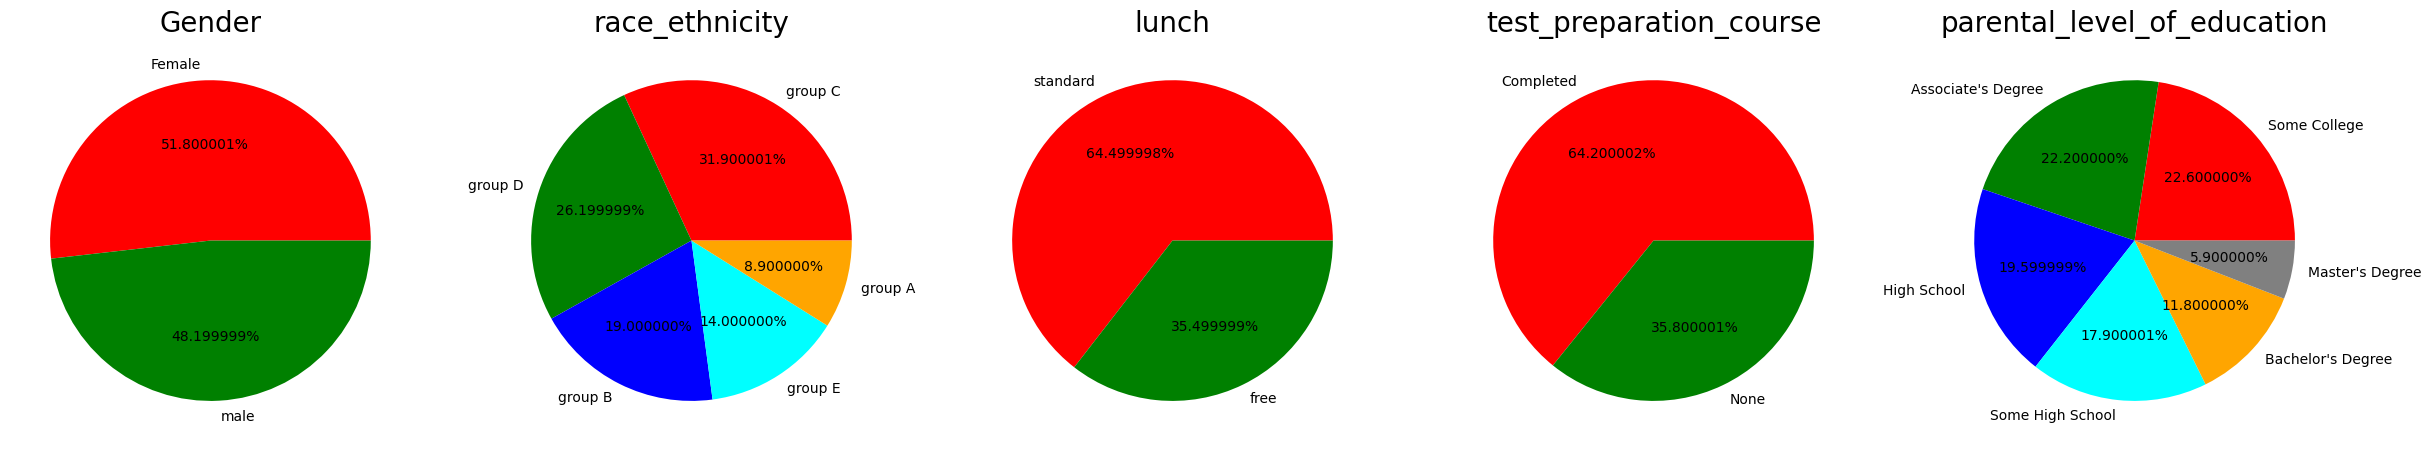

In [54]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','male'
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title("Gender",fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group C','group D','group B','group E','group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title("race_ethnicity",fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard','free'
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title("lunch",fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='Completed','None'
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title("test_preparation_course",fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels='Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title("parental_level_of_education",fontsize=20)
plt.axis('off')


- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [40]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [50]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [56]:
##Gender column
## what is distribution of gender(Normal,Gaussian,binomial etc)
## does gender have any imapct on student perfrmance

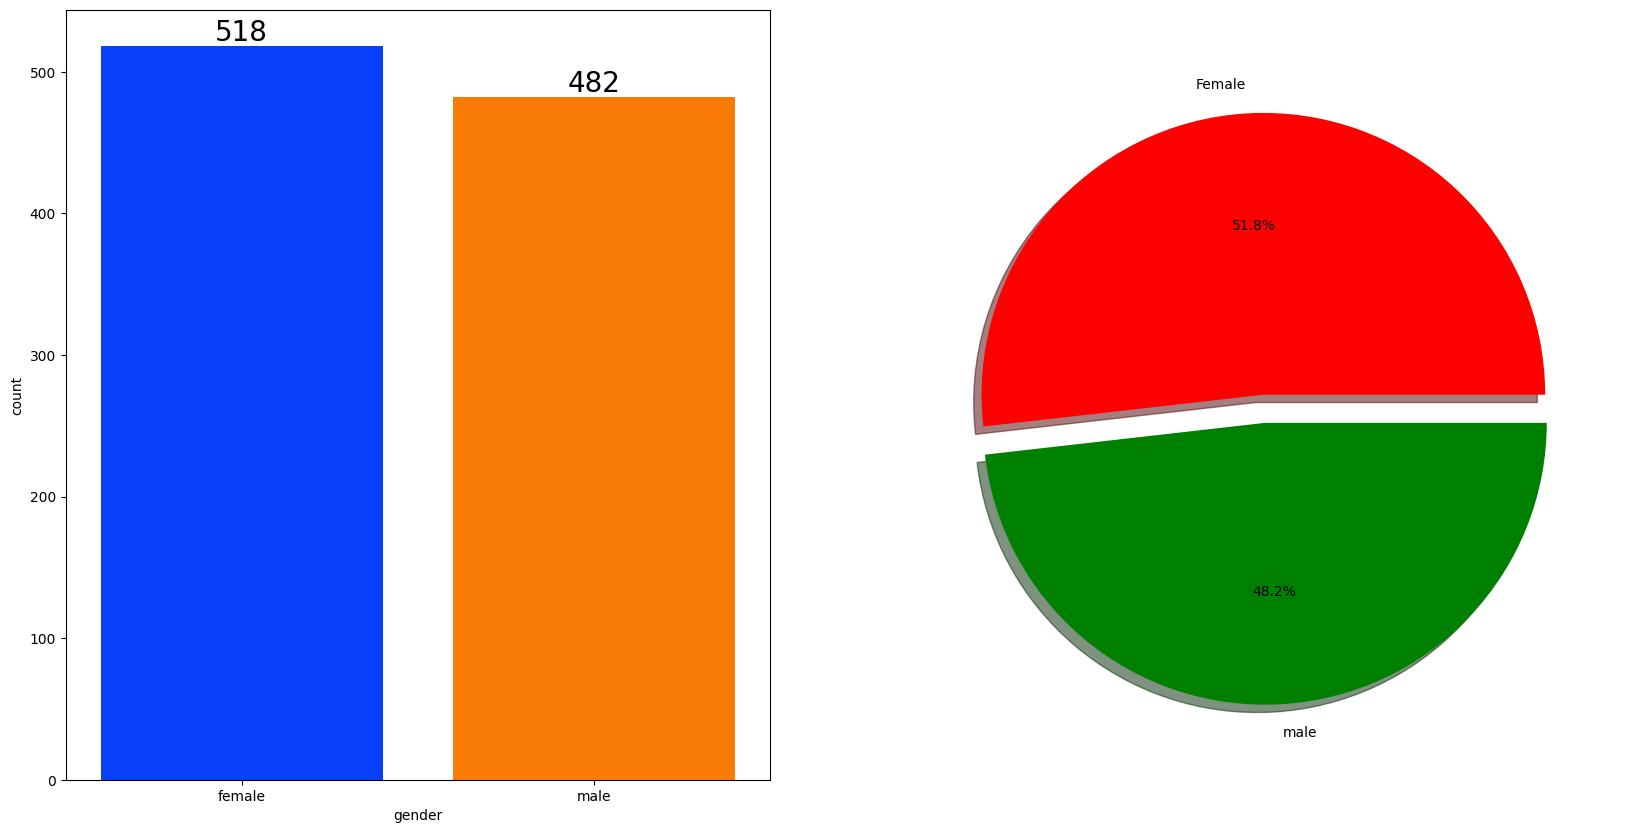

In [58]:
## distribution of gender
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Female','male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','green'])
plt.show()

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

In [60]:
## is gender column have any impact on performanceon students
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


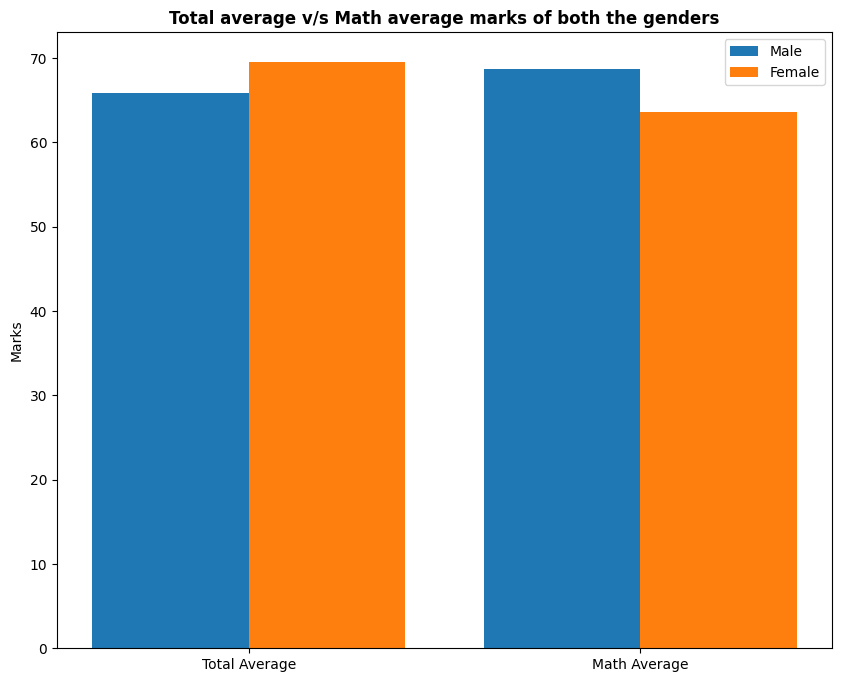

In [61]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

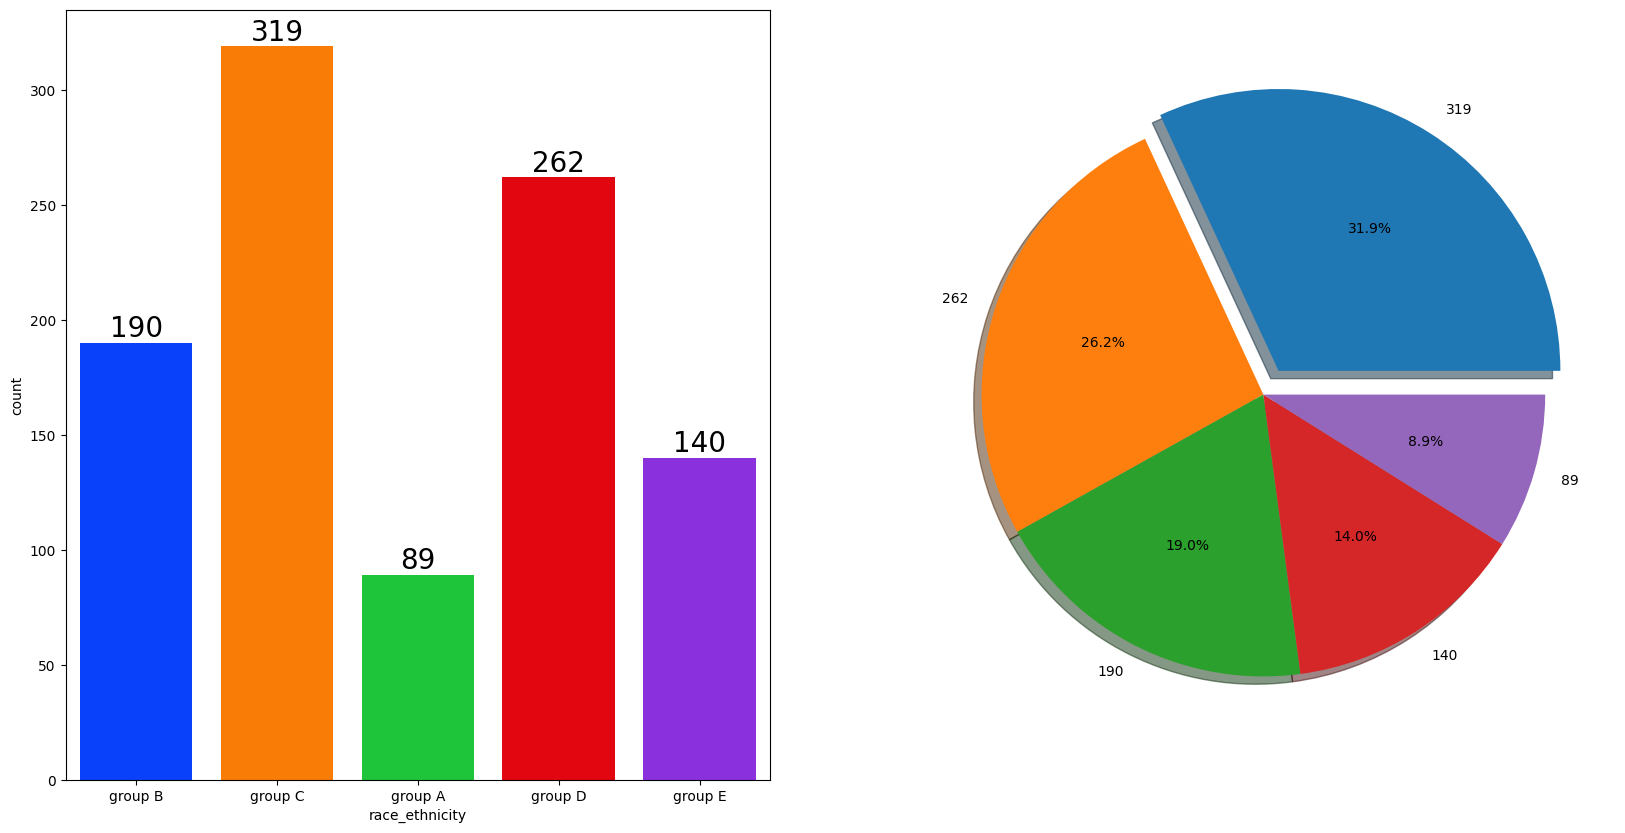

In [69]:
## now evalute other columns as well
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

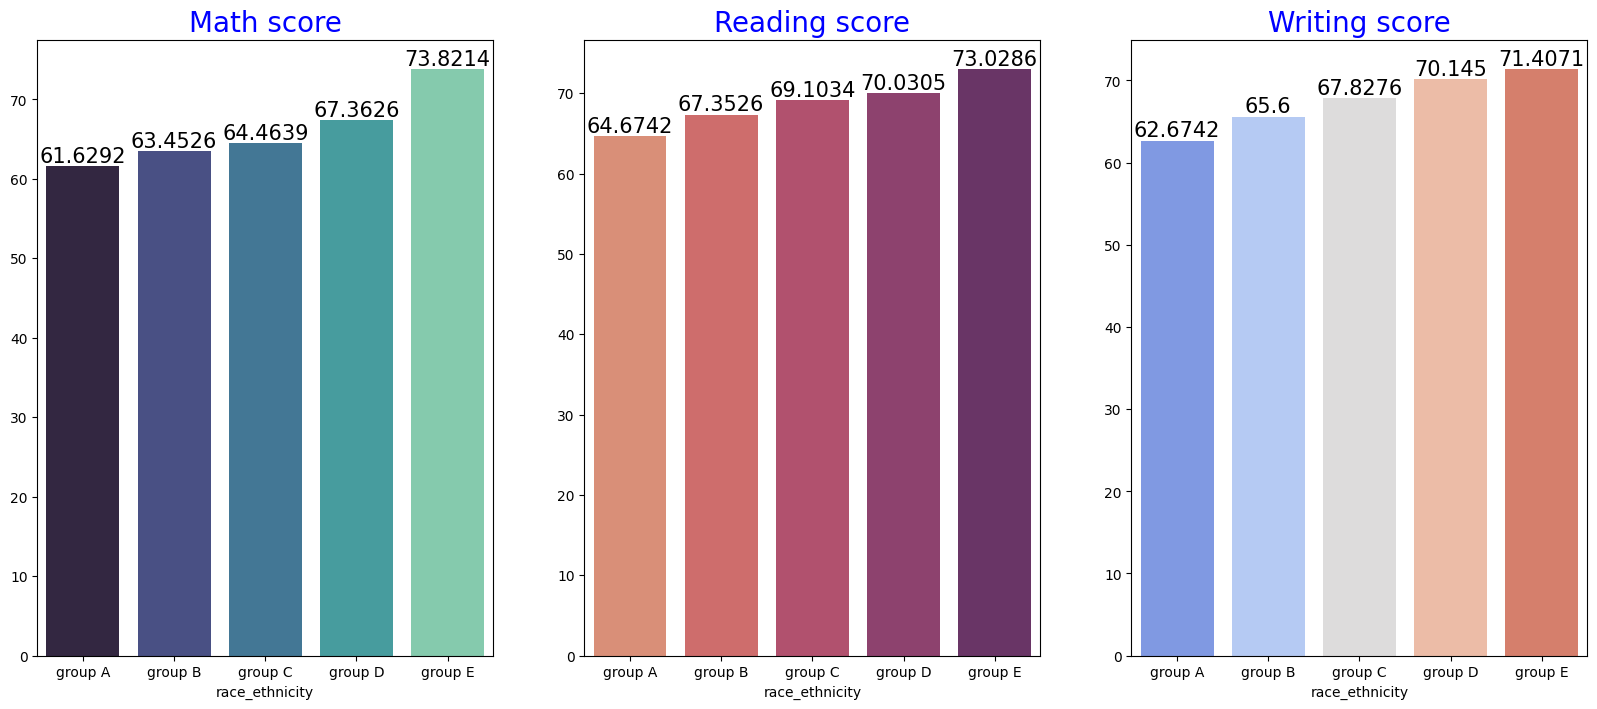

In [72]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='blue',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='blue',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='blue',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 

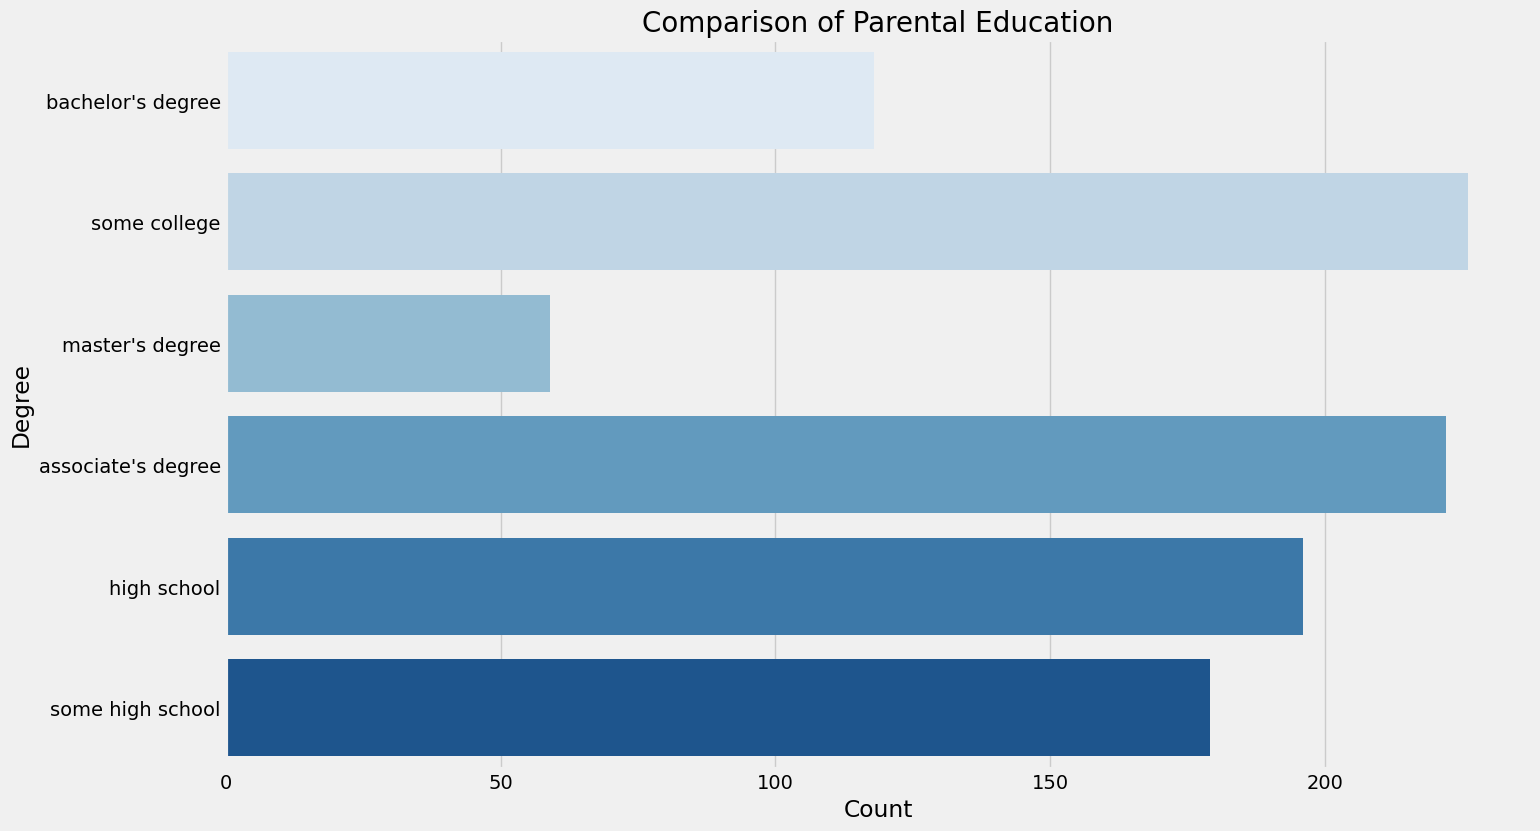

In [78]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

- Largest number of parents are from some college.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


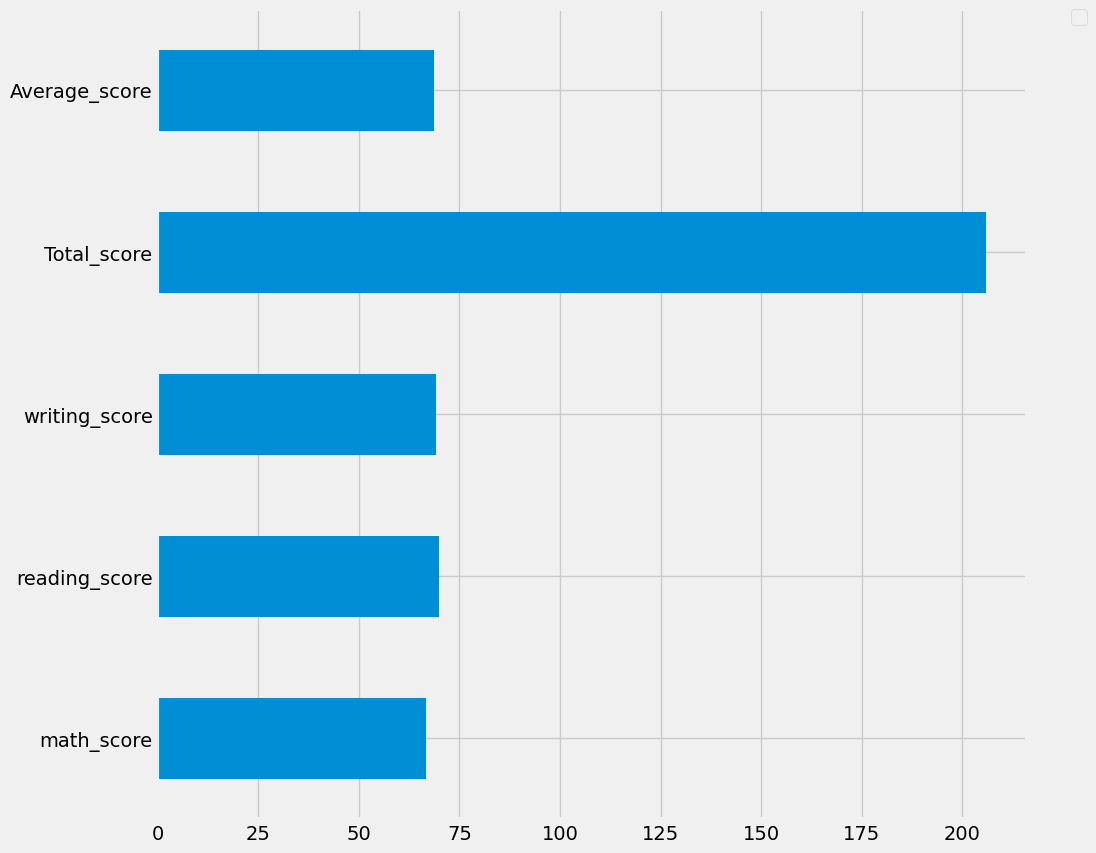

In [80]:
df.groupby('parental_level_of_education').mean(numeric_only=True).agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

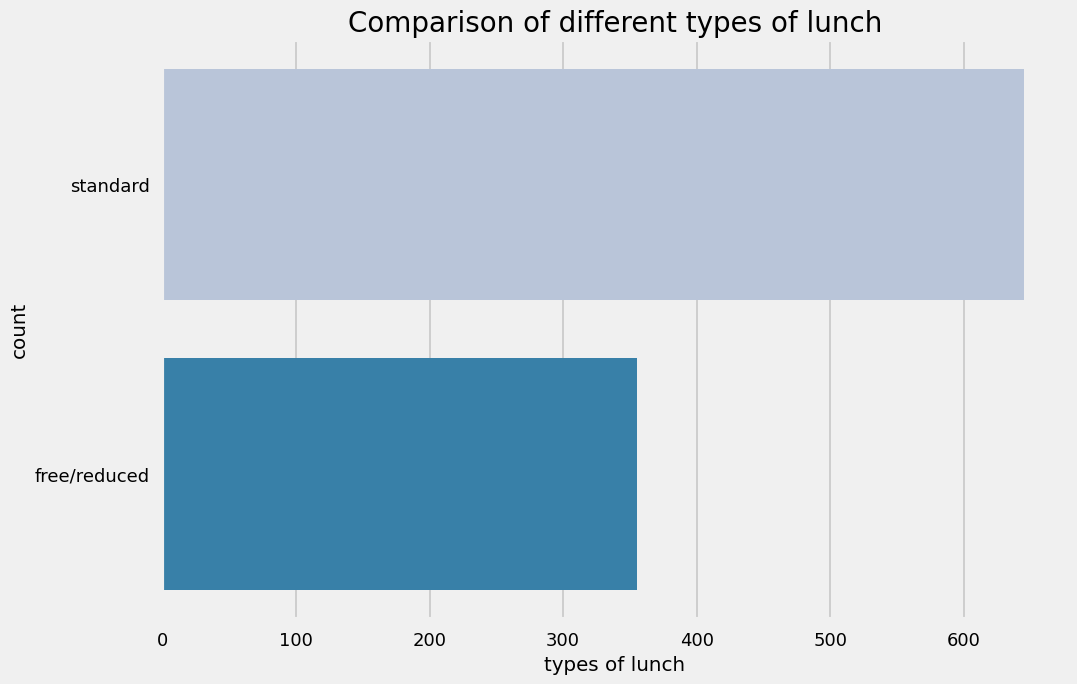

In [81]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- Students being served Standard lunch was more than free lunch

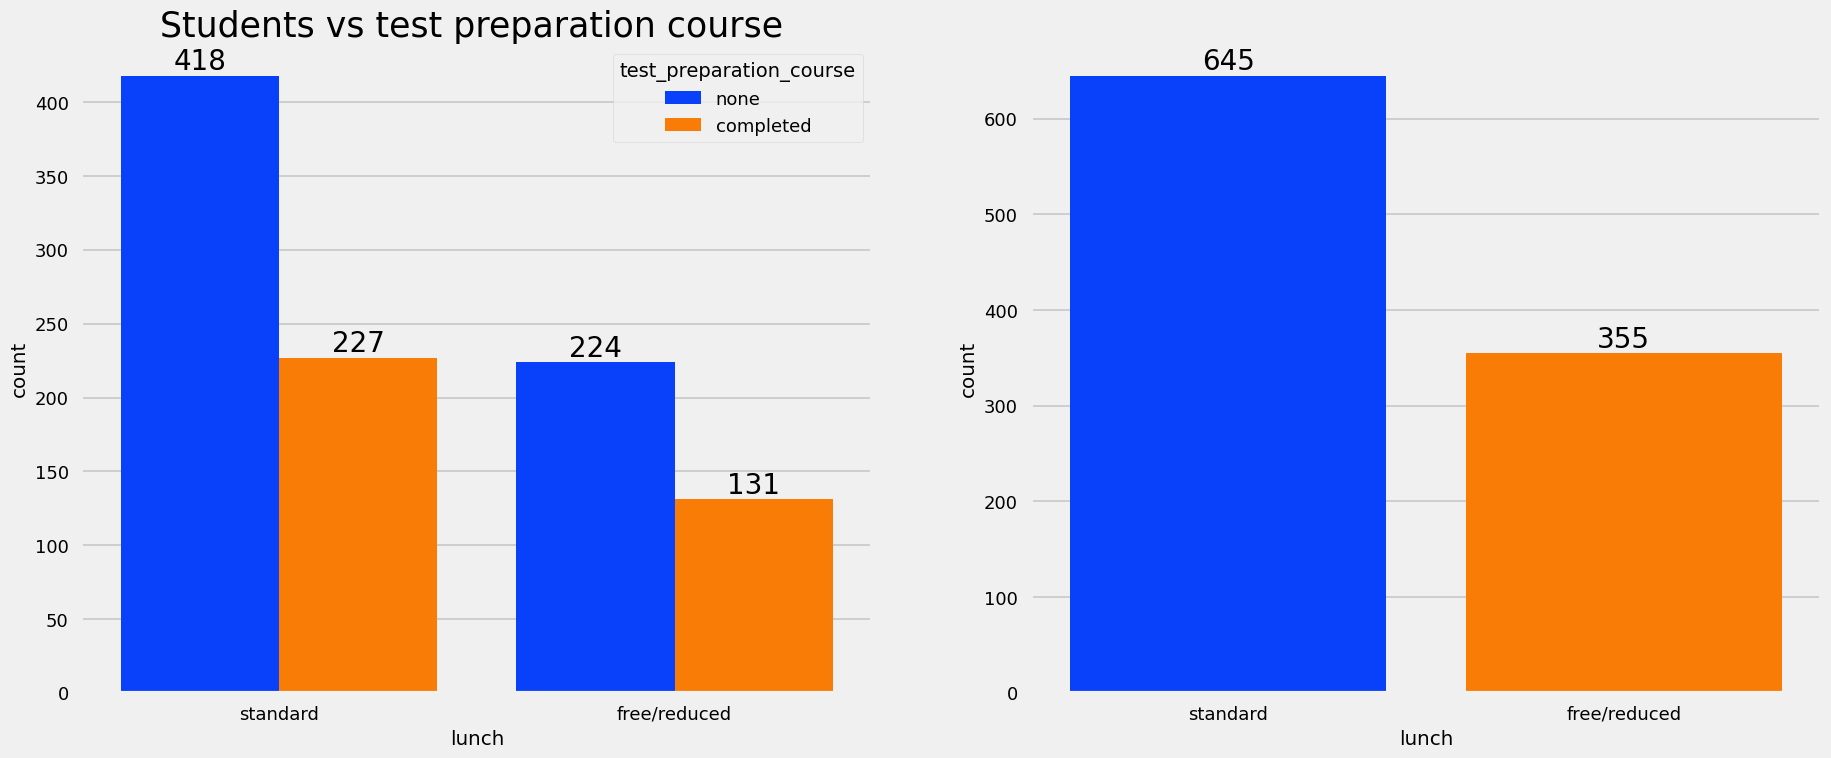

In [83]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

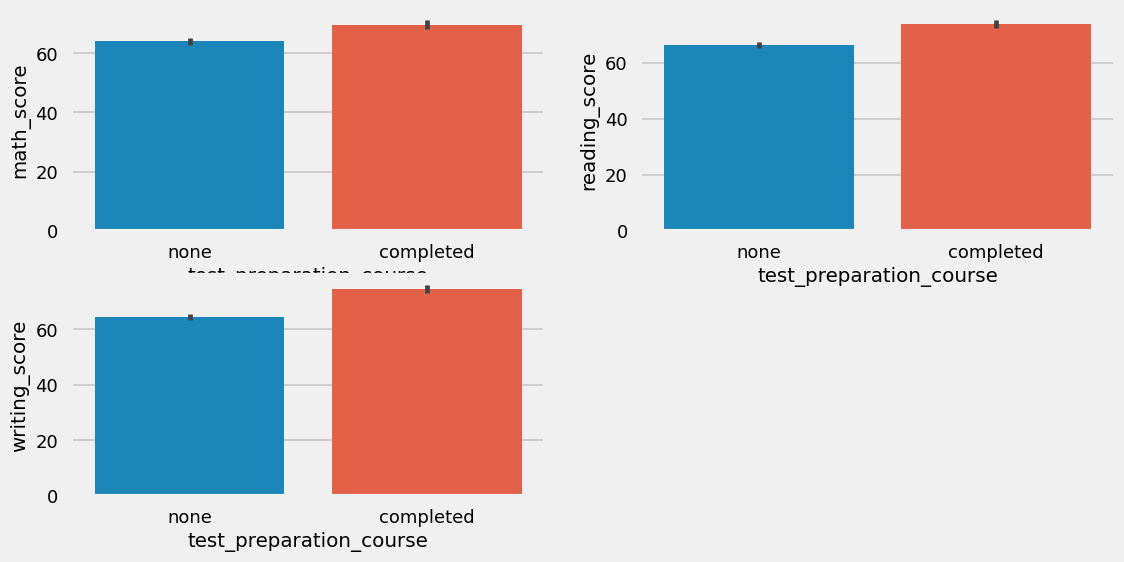

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'], hue=df['test_preparation_course'])

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

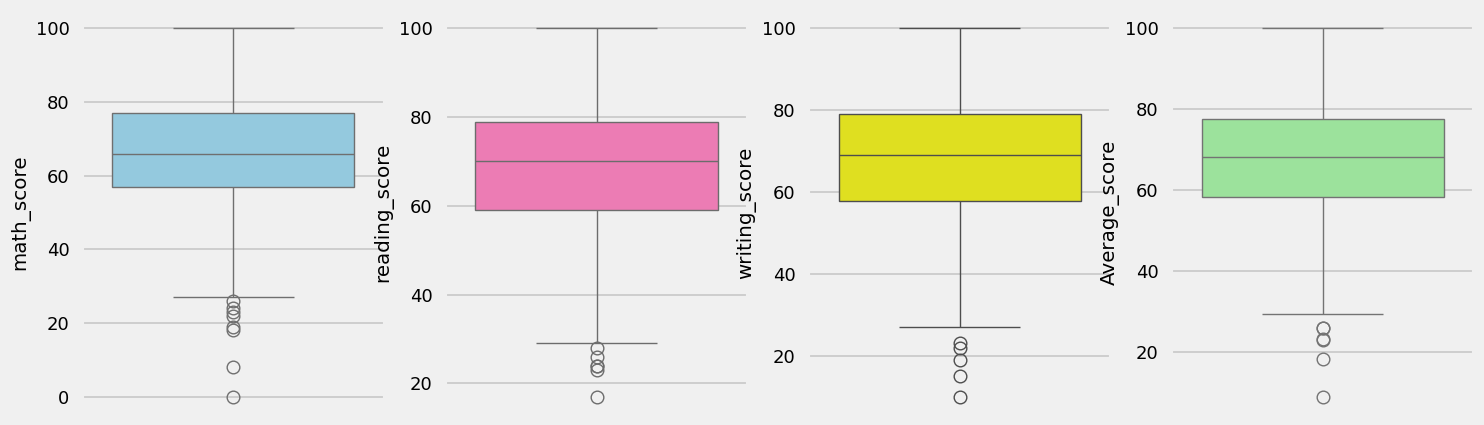

In [87]:
## Check outliers(using boxplot)
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

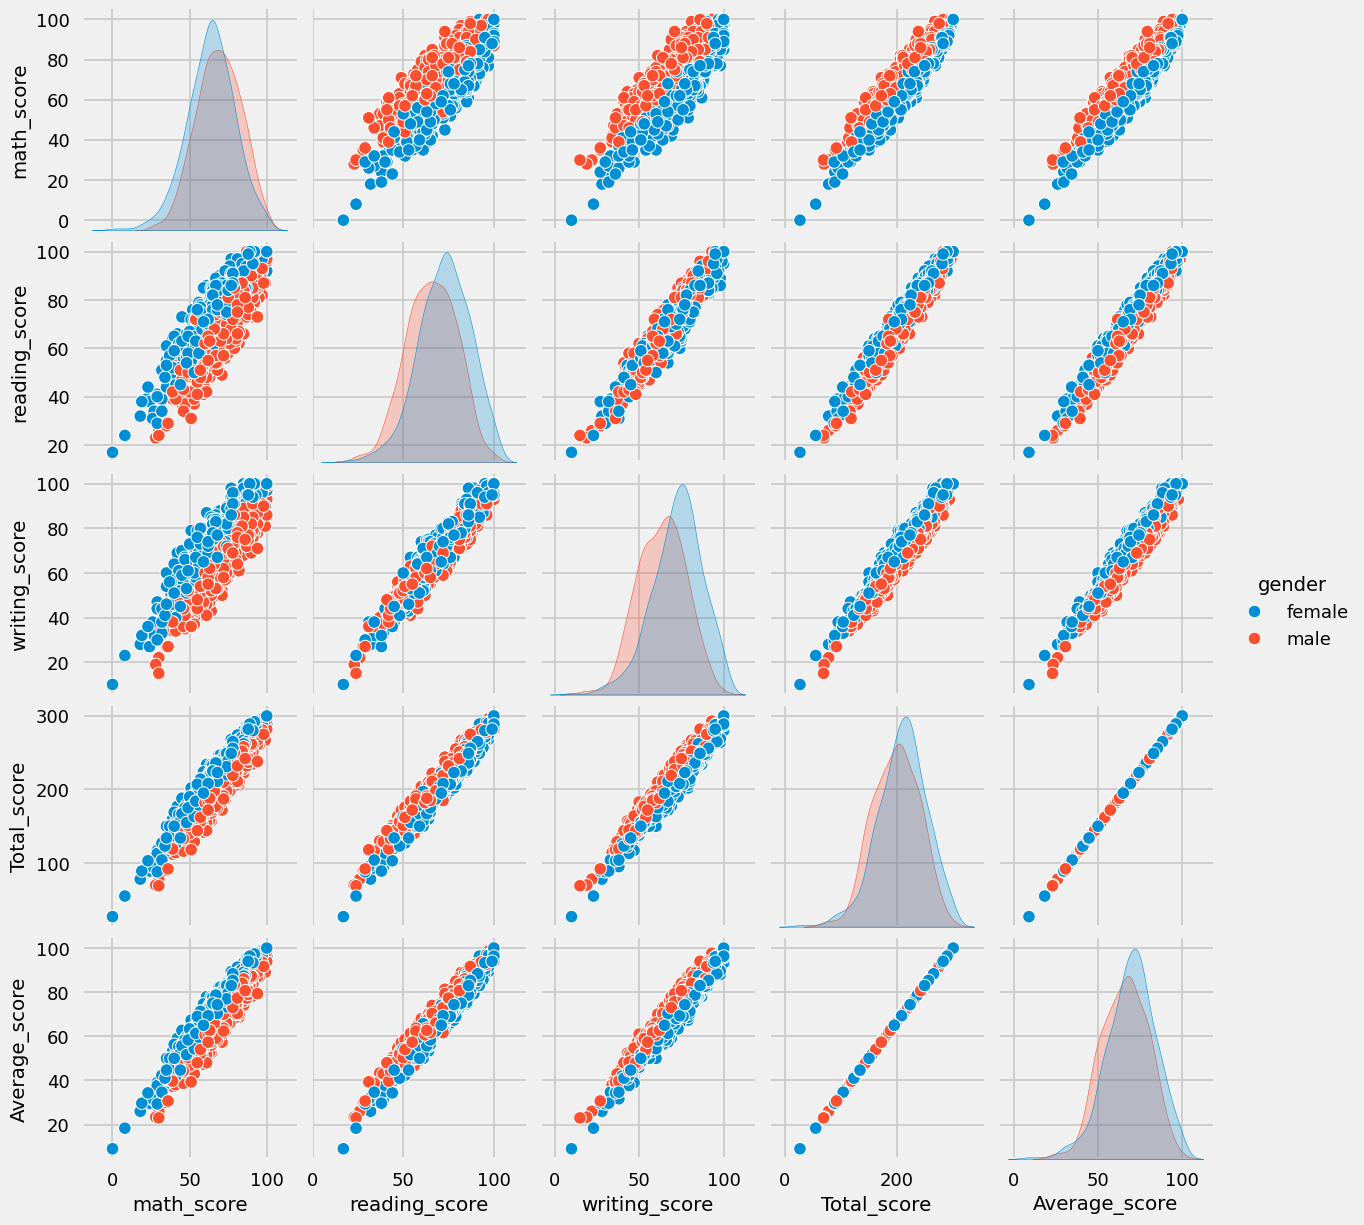

In [88]:
sns.pairplot(df,hue = 'gender')
plt.show()


- From the above plot it is clear that all the scores increase linearly with each other.

###  Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.